<a href="https://colab.research.google.com/github/SanchaliJana/Pandas-vs-Fireducks/blob/main/FireDucks_vs_Pandas_Data_Engineering_%26_Large_Scale_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fireducks pandas matplotlib numpy duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [2]:
FIREDUCKS_FLAGS = "--benchmark-mode"

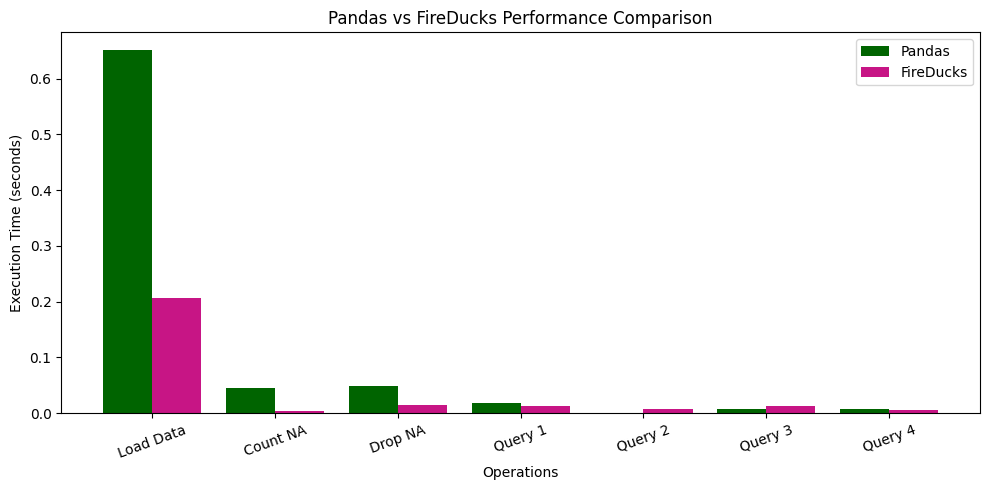

In [3]:
import time
import pandas as pd
import fireducks.pandas as fd
import matplotlib.pyplot as plt

operations = ["Load Data", "Count NA", "Drop NA", "Query 1", "Query 2", "Query 3", "Query 4"]

# Functions for different operations
def countna(df):
    return df.isnull().sum()

def dropna(df):
    return df.dropna()

def q1(df):
    return df.groupby('country')['points'].max().sort_values(ascending=False).head(10)

def q2(df):
    return df[df['price'] == df['price'].max()]

def q3(df):
    return df['variety'].value_counts().head(10)

def q4(df):
    return df.groupby('points')['price'].mean().sort_index()

# Ensure FireDucks executes operations
def evaluate(df):
    try:
        df._evaluate()
    except:
        pass  # Ignore for Pandas

# Function to measure execution time
def run_analysis(module, filename):
    times = []

    # Load Data
    start = time.time()
    df = module.read_csv(filename)
    evaluate(df)
    times.append(time.time() - start)

    # Run each operation
    for func in [countna, dropna, q1, q2, q3, q4]:
        start = time.time()
        result = func(df)
        evaluate(result)
        times.append(time.time() - start)

    return times

filename = "/content/winemag-data-130k-v2.csv"

# Run analysis
pandas_times = run_analysis(pd, filename)
fireducks_times = run_analysis(fd, filename)

# Visualizing the results
plt.figure(figsize=(10, 5))
x = range(len(operations))

plt.bar(x, pandas_times, width=0.4, label="Pandas", align='center', color='#006400')
plt.bar([i + 0.4 for i in x], fireducks_times, width=0.4, label="FireDucks", align='center', color='#C71585')

# Labels and titles
plt.xlabel("Operations")
plt.ylabel("Execution Time (seconds)")
plt.title("Pandas vs FireDucks Performance Comparison")
plt.xticks([i + 0.2 for i in x], operations, rotation=20)
plt.legend()
plt.tight_layout()
plt.show()
